# Visualizations of P-Nodes
Includes scatter plots.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from pq_helper import get_dataframe

Load in the data:

In [15]:
data_path = 'data/acm95a100a2018_anonymized_modified.xlsx'
df = pd.read_excel(data_path)
df = df.apply(pd.to_numeric, errors='ignore')

In [16]:
df

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


We first perform some data tidying. We will create a column to group options into fewer categories based on a dictionary which maps each option into its academic division. We will also create a column that groups options into either the top 6 divisions or 'Other'. 

In [19]:
Nstudent = 184
Option = df['Option']

option_dict = {'ACM': 'CMS', 'AM': 'MCE', 'APh': 'APMS', 'Ae':'EAS', 'Aph':'APMS', 'BE':'BBE', 'BMB':'CCE', 'Bi':'BBE', 'CS':'CMS', 'Ch':'CCE', 'ChE': 'CCE', 'ChE (BM)':'CCE', 'ChE (Env)':'CCE', 'ChE (MS)':'CCE', 'ChE (PS)': 'CCE', 'EE':'EE', 'Eng': 'Hum', 'Eng (CNS)': 'Hum', 'Ge': 'GPS', 'ME':'MCE', 'MS':'APMS', 'MedE': 'MedE', 'Ph': 'PMA', 'PlSc':'Hum', 'SE':'EAS', 'AsPh':'PMA'}
top_divisions = ['PMA', 'EE', 'MCE', 'EAS', 'CCE', 'APMS']

new_option_dict = dict()
for k in option_dict:
    if option_dict[k] in top_divisions:
        new_option_dict[k] = option_dict[k]
    else:
        new_option_dict[k] = 'Other'

divisions = np.array([option_dict[i] for i in Option[0:Nstudent]])
new_divisions = np.array([new_option_dict[i] for i in Option[0:Nstudent]])

We'll also create a column for students' grades, omitting $\pm$ grades:

In [23]:
Grade = df['Grade']
Grade_values = [u'A+', u'A', u'A-', u'B+', u'B', u'B-', u'C+', u'C', u'C-', u'D+']

letter_grades = [grade[0] for grade in Grade[0:Nstudent]] 
sorted_grade_values = sorted(set(letter_grades))

We will create a column to indicate each student's seniority (i.e. Undergrad vs Grad):

In [24]:
Class = df['Class']
seniority = [clas[0] for clas in Class[0:Nstudent]]

class_values = sorted(set(Class[0:Nstudent]))

We will also pull out the `N-Score` of each student for later use:

In [28]:
Nscore = df['N-Score']

Now, we construct a dataframe that omits TAs and instructor and includes the columns we constructed above:

In [27]:
df_student = df.iloc[0:Nstudent]
df_student['Division'] = pd.Series(divisions)
df_student['NewDivision'] = pd.Series(new_divisions)
df_student['LetterGrade'] = pd.Series(letter_grades)
df_student['Seniority'] = pd.Series(seniority)

<ipython-input-27-37bf246dd8e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['Division'] = pd.Series(divisions)
<ipython-input-27-37bf246dd8e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['NewDivision'] = pd.Series(new_divisions)
<ipython-input-27-37bf246dd8e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [29]:
df_student

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority,Division,NewDivision,LetterGrade
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U,MCE,MCE,B
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U,CMS,Other,A
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U,CMS,Other,A
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U,CMS,Other,A
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U,MCE,MCE,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,P180,Student,U2,ACM,2.0,176,111,5,2,0,3,0.917763,A+,1,2,3,U,CMS,Other,A
180,P181,Student,G1,MedE,10.0,69,156,22,10,0,2,0.913733,A+,1,18,2,G,MedE,Other,A
181,P182,Student,U3,CS,1.0,150,206,0,0,0,0,0.639748,A-,0,0,0,U,CMS,Other,A
182,P183,Student,G1,MedE,7.0,94,113,0,0,0,0,0.778504,A,0,0,0,G,MedE,Other,A


We will now examine some plots based on the data that Piazza collects, starting with `DaysOnline`. We first compare the `DaysOnline` for undergrads vs graduate students:

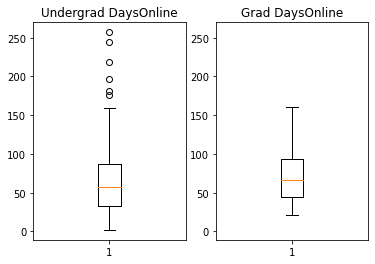

In [40]:
Undergrad = ['U2', 'U3', 'U4']
Undergrad_df = df.loc[df['Class'].isin(Undergrad)]

Grad = ['G1', 'G2', 'G5']
Grad_df = df.loc[df['Class'].isin(Grad)]

fig, axs = plt.subplots(1, 2)

axs[0].boxplot(Undergrad_df['DaysOnline'])
axs[0].set_title('Undergrad DaysOnline')
bottom, top = axs[0].get_ylim()

axs[1].boxplot(np.array(Grad_df['DaysOnline']))
axs[1].set_title('Grad DaysOnline')
axs[1].set_ylim(bottom, top)

plt.show()

In general, the distributions appear similar. There are more undergraduate outliers who spent more `DaysOnline` compared to graduate students.

We now compare `DaysOnline` across classes, omitting `U4`, `G2`, and `G5` due to the small sample size for those classes:

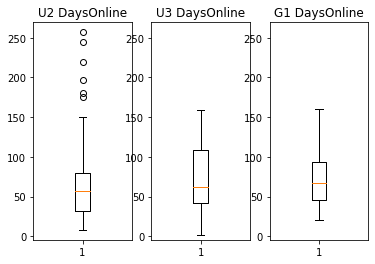

In [41]:
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(df.loc[df['Class'] == 'U2']['DaysOnline'])
axs[0].set_title('U2 DaysOnline')
bottom, top = axs[0].get_ylim()

axs[1].boxplot(np.array(df.loc[df['Class'] == 'U3']['DaysOnline']))
axs[1].set_title('U3 DaysOnline')
axs[1].set_ylim(bottom, top)

axs[2].boxplot(np.array(df.loc[df['Class'] == 'G1']['DaysOnline']))
axs[2].set_title('G1 DaysOnline')
axs[2].set_ylim(bottom, top)

plt.show()

Again, there does not appear to be a significant difference across classes. 

Let's examine the same plots across options (divisions), excluding GPS as that division only had one student:

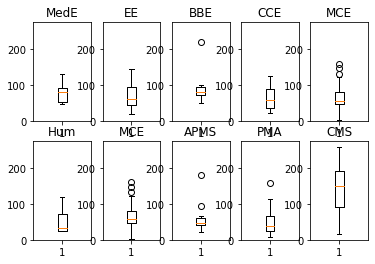

In [42]:
fig, axs = plt.subplots(2, 5)
set1 = ['MedE', 'EE', 'BBE', 'CCE', 'MCE']
set2 = ['Hum', 'MCE', 'APMS', 'PMA', 'CMS']

for i in range(len(set1)):
    axs[0, i].boxplot(np.array(df_student.loc[df_student['Division'] == set1[i]]['DaysOnline']))
    axs[0, i].set_title(set1[i])
    axs[0, i].set_ylim(0, 275)

for j in range(len(set2)):
    axs[1, j].boxplot(np.array(df_student.loc[df_student['Division'] == set2[j]]['DaysOnline']))
    axs[1, j].set_title(set2[j])
    axs[1, j].set_ylim(0, 275)

plt.show()

We notice that students in the CMS department appear to have spent more `DaysOnline` compared to other divisions. 

Finally, let's examine `DaysOnline` for students with different grades, omitting the `D` grade as only one student achieved that grade:

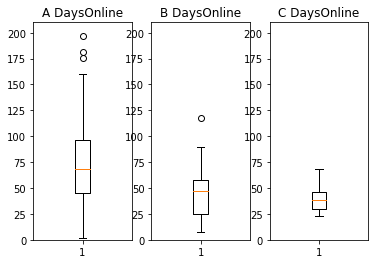

In [45]:
set3 = ['A', 'B', 'C']

fig, axs = plt.subplots(1, 3)
for k in range(len(set3)):
    axs[k].boxplot(np.array(df_student.loc[df_student['Letter Grade'] == set3[k]]['DaysOnline']))
    axs[k].set_title(set3[k] + ' DaysOnline')    
    axs[k].set_ylim(0, 210)

plt.savefig('16. Boxplot of DaysOnline for different grades.png')
plt.show()

We notice that in general, students who spent more `DaysOnline` tended to have higher grades. However, the spread of `DaysOnline` is also higher for higher grades, as more students scored `A`s compared to `B`s or `C`s. 

After `DaysOnline`, we will examine similar plots for `Views`, starting with a comparison between undergrads and grads:

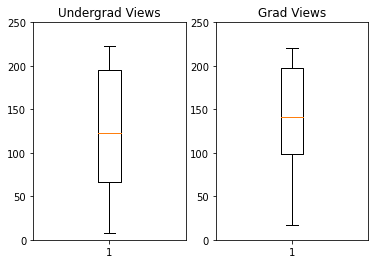

In [46]:
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(Undergrad_df['Views'])
axs[0].set_title('Undergrad Views')
axs[0].set_ylim(0, 250)

axs[1].boxplot(np.array(Grad_df['Views']))
axs[1].set_title('Grad Views')
axs[1].set_ylim(0, 250)

plt.show()

Again, there is little difference. Next, we compare between classes:

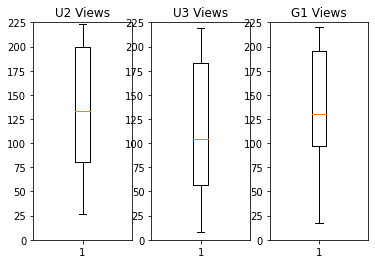

In [49]:
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(df.loc[df['Class'] == 'U2']['Views'])
axs[0].set_title('U2 Views')
axs[0].set_ylim(0, 225)

axs[1].boxplot(np.array(df.loc[df['Class'] == 'U3']['Views']))
axs[1].set_title('U3 Views')
axs[1].set_ylim(0, 225)

axs[2].boxplot(np.array(df.loc[df['Class'] == 'G1']['Views']))
axs[2].set_title('G1 Views')
axs[2].set_ylim(0, 225)

plt.show()

Seeing no obvious differences, we will then look at `Views` across divisions:

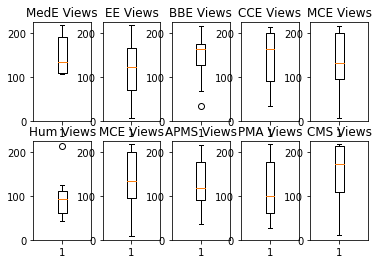

In [51]:
fig, axs = plt.subplots(2, 5)

for i in range(len(set1)):
    axs[0, i].boxplot(np.array(df_student.loc[df_student['Division'] == set1[i]]['Views']))
    axs[0, i].set_title(set1[i] + ' Views')
    axs[0, i].set_ylim(0, 225)

for j in range(len(set2)):
    axs[1, j].boxplot(np.array(df_student.loc[df_student['Division'] == set2[j]]['Views']))
    axs[1, j].set_title(set2[j] + ' Views')
    axs[1, j].set_ylim(0, 225)

plt.show()

As with `DaysOnline`, `Views` for CMS seem to be on the higher side. However, the difference is less severe and overall the divisions appear similar in terms of `Views`.

Finally, we compare across grades:

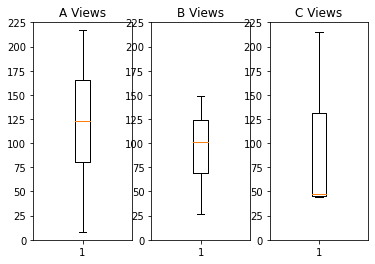

In [53]:
fig, axs = plt.subplots(1, 3)
for k in range(len(set3)):
    axs[k].boxplot(np.array(df_student.loc[df_student['Grade'] == set3[k]]['Views']))
    axs[k].set_title(set3[k] + ' Views')    
    axs[k].set_ylim(0, 225)
    
plt.show()

There were both `A` and `C` students with a high number of `Views`, and overall the spreads for each grade are similar. There does not appear to be a correlation between `Views` and the students' grades.

We will now make similar comparisons for `N-Score`, starting with undergrad vs grad.

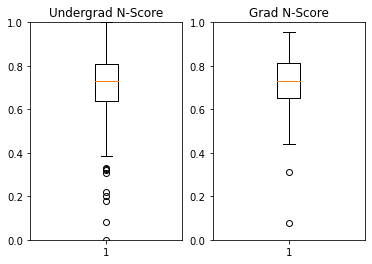

In [54]:
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(Undergrad_df['N-Score'])
axs[0].set_title('Undergrad N-Score')
axs[0].set_ylim(0, 1)

axs[1].boxplot(np.array(Grad_df['N-Score']))
axs[1].set_title('Grad N-Score')
axs[1].set_ylim(0, 1)

plt.show()

We do not notice any significant differences. A few more low outliers exist for undergrads, but the $25-75$th percentiles and the overall spreads of `N-Score` are similar for both undergrads and grads.

We will now compare `N-Score` across classes:

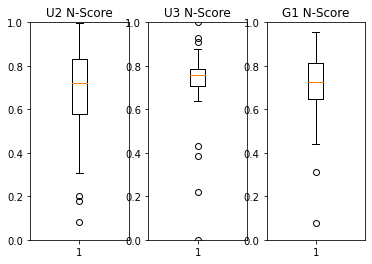

In [55]:
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(df.loc[df['Class'] == 'U2']['N-Score'])
axs[0].set_title('U2 N-Score')
axs[0].set_ylim(0, 1)

axs[1].boxplot(np.array(df.loc[df['Class'] == 'U3']['N-Score']))
axs[1].set_title('U3 N-Score')
axs[1].set_ylim(0, 1)

axs[2].boxplot(np.array(df.loc[df['Class'] == 'G1']['N-Score']))
axs[2].set_title('G1 N-Score')
axs[2].set_ylim(0, 1)

plt.show()

The `N-Score`s for `U3` appear to be more concentrated than those for `U2` and `G1`, though the overall spread is similar across all three classes. The mean `N-Score` for `U3` is slightly higher than those for `U2` and `G1`, but the middle $50\%$ of `N-Scores` overlap for all three classes.

Finally, we will look at `N-Score`s across divisions:

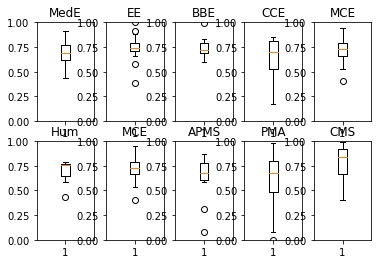

In [57]:
fig, axs = plt.subplots(2, 5)

for i in range(len(set1)):
    axs[0, i].boxplot(np.array(df_student.loc[df_student['Division'] == set1[i]]['N-Score']))
    axs[0, i].set_title(set1[i])
    axs[0, i].set_ylim(0, 1)

for j in range(len(set2)):
    axs[1, j].boxplot(np.array(df_student.loc[df_student['Division'] == set2[j]]['N-Score']))
    axs[1, j].set_title(set2[j])
    axs[1, j].set_ylim(0, 1)

plt.show()

No division stands out as extremely different from the others. The highest mean `N-Score` comes from the CMS division, which is not surprising considering that ACM students belong to the CMS division and are perhaps more suited to perform well in an ACM course. 

Overall, after examining the `DaysOnline`, `Views`, and `N-Score`s, there do not appear to be many differences across seniority, classes, divisions, and grades. The most notable observations came from students in CMS having higher `DaysOnline` and higher `N-Scores` compared to other divisions, and `DaysOnline` being somewhat positively correlated with letter grade. However, the majority of our initial data exploration in this area indicates that factors such as `DaysOnline`, `Views`, seniority, class, and division do not affect a student's overall performance in the course. 

### Attributions

Notebook created by Amanda Li. 

Modified from `visualizations_p_nodes_scatter.py` by Siqiao Mu.